In [1]:
import pandas as pd # Import the Pandas library.

In [2]:
SW_Crane_Frida = pd.read_csv('20181003_Dataset_SV_GPS_Crane_9381_STAW_Crane_RRW-BuGBk_Frida.csv') # Read the dataset.

In [3]:
SW_Crane_Frida[:1] # Show the first row of the dataframe.

,event-id,visible,timestamp,location-long,location-lat,argos:altitude,gps:fix-type,gps:hdop,gps:vdop,ground-speed,heading,height-above-ellipsoid,tag-tech-spec,tag-voltage,sensor-type,individual-taxon-canonical-name,tag-local-identifier,individual-local-identifier,study-name
0,1154727247,True,2013-07-21 03:06:32.000,13.583908,57.503796,NaN,3,2.0,3.0,0.0,NaN,193.0,NaN,4110.0,gps,Grus grus,9381,9381,"GPS telemetry of Common Cranes, Sweden"


In [4]:
len(SW_Crane_Frida) # Print the amount of datarows in the dataset.

123805

In [5]:
len(SW_Crane_Frida.columns) # Print the amount of columns in the dataset

19

In [7]:
SW_Crane_Frida.dtypes # Print the column names and datatypes.

event-id                             int64
visible                               bool
timestamp                           object
location-long                      float64
location-lat                       float64
argos:altitude                     float64
gps:fix-type                         int64
gps:hdop                           float64
gps:vdop                           float64
ground-speed                       float64
heading                            float64
height-above-ellipsoid             float64
tag-tech-spec                      float64
tag-voltage                        float64
sensor-type                         object
individual-taxon-canonical-name     object
tag-local-identifier                 int64
individual-local-identifier          int64
study-name                          object
dtype: object

In [10]:
import cartopy # The Python package for Geospatial data processing.
import cartopy.crs as ccrs # The module for specifying the map projection
import cartopy.feature as cfeature # The module for adding features to the map.
import matplotlib.pyplot as plt # The Python package for creating plots.

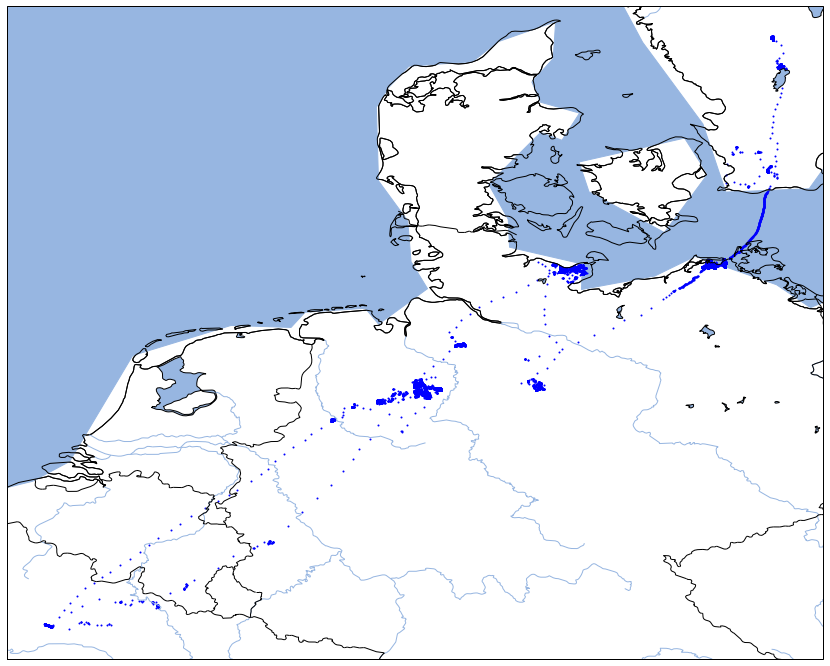

In [15]:
'''
Below we create a new plot using MathPlotLib. 
We pass the a size of the figure as parameter. 
'''
plt.figure(figsize = (20, 12))

'''
Below we create a new Catopy map. 

We pass the projection of the Cartopy map as parameter. 
The projection we are going to use is called: "PlatteCarree". The crs stands for: "Coordinate Reference system".
The type of CRS used in the Cartopy map defines the way the map will be shown. PlatteCarre uses
equirectangular projection (North Latitude and East Longitude). 
We assign the instance of the plot to a variable called: "cartopyMapCranes".
'''
cartopyMapCranes = plt.axes(projection=ccrs.PlateCarree())

'''
Below we add the coastal lines to the cartopy map. We pass the resolution: "10m" as parameter. This value defines
the maximum deviation the coastal line can have. The higher the value, the higher the deviation of the correct
location of the lines.
'''
cartopyMapCranes.coastlines(resolution='10m')

'''
Below we add the landsurface to the Cartopy map.We give the landsurface (face) the color white. 
We give the edges of the landsurface (edge) te color black.
'''
cartopyMapCranes.add_feature(cartopy.feature.LAND.with_scale('10m'), edgecolor='black', facecolor = "white")
'''
Below we add the lakes to the cartopy map. 
We give the edges of the lake the color black.
'''
cartopyMapCranes.add_feature(cfeature.LAKES.with_scale('10m'), edgecolor = 'black')

'''
Below we add the sea surface to the Cartopy Map
'''
cartopyMapCranes.add_feature(cfeature.OCEAN) 

'''
Below we add the rivers and the borders to the Cartopy Map
'''
cartopyMapCranes.add_feature(cfeature.RIVERS.with_scale('10m')) 
cartopyMapCranes.add_feature(cfeature.BORDERS.with_scale('10m'))

'''
Below we add the Datapoints of the Crane: "Frida" to the Cartopy Map instance.
'''
cartopyMapCranes.scatter(SW_Crane_Frida['location-long'], SW_Crane_Frida['location-lat'], color="blue", s = 1)

In [18]:
# Define the columns which we want to filter from the dataset.
columns_to_filter = ['event-id', 'study-name',
                     'timestamp','visible',
                     'ground-speed','heading',
                     'location-long','location-lat',
                     'height-above-ellipsoid',
                     'individual-taxon-canonical-name',
                     'sensor-type','tag-voltage',                                          
                     'individual-local-identifier']

In [19]:
Filtered_SW_Crane_Frida = SW_Crane_Frida[columns_to_filter] # Filter the selected columns from the old dataframe.

In [20]:
Filtered_SW_Crane_Frida[:1] # Show first row of new dataframe.

,event-id,study-name,timestamp,visible,ground-speed,heading,location-long,location-lat,height-above-ellipsoid,individual-taxon-canonical-name,sensor-type,tag-voltage,individual-local-identifier
0,1154727247,"GPS telemetry of Common Cranes, Sweden",2013-07-21 03:06:32.000,True,0.0,NaN,13.583908,57.503796,193.0,Grus grus,gps,4110.0,9381


In [24]:
import json #Import the Python JSON Module

In [21]:
# Create Crane Tracker test data 
crane_test_data = {
    'event-id':432,
    'lat': 1342.43,
    'lon': 33.1
}

In [25]:
# Write the test data to a file called: "json_module_python.json"
# We pass the test data as first parameter and the newly created 
# json file as second parameter.
with open ('json_module_python.json', 'w') as json_file:
    json.dump(crane_test_data, json_file)

In [27]:
# Read the test data that was writen to a file in the previous step.
# We assign the name of the JSON file to a variable called json_file
# after which we pass the file as parameter in the json.load() function.
# We assign the loaded data to a variable called: "test_dataset".
with open('json_module_python.json') as json_file:
    test_dataset = json.load(json_file)

In [28]:
test_dataset # Print the loaded test data.

{'event-id': 432, 'lat': 1342.43, 'lon': 33.1}

In [29]:
json.dumps(test_dataset) # Print the loaded test data in a correct JSON format.

'{"event-id": 432, "lat": 1342.43, "lon": 33.1}'

In [33]:
# Create a new dataframe using the created test data.
pandas_dataframe = pd.DataFrame([crane_test_data])

# Create a new JSON file and write the dataframe to this file. 
# We do this by using the Pandas function: "to_json()" in which 
# we pass the name of the JSON file as first parameter and the 
# orientation in which the data has to be written as second parameter.
pandas_dataframe.to_json('json_module_pandas.json',orient = 'records')

# Read the newly created JSON file and assign it to a dataframe.
# We use the syntax: "to_json()" to print the data as JSON and 
# not as an dataframe.
pd.read_json('json_module_pandas.json').to_json()

'{"event-id":{"0":432},"lat":{"0":1342.43},"lon":{"0":33.1}}'

In [34]:
# Transforming the Crane Dataset using the function: "to_json()" from Pandas
Filtered_SW_Crane_Frida.to_json('Frida_SW.json', orient = 'records')

In [ ]:
# Read the Transformed dataset using the built-in Python function.
with open('Frida_SW.json') as transformed_Crane_Dataset:
    crane_data = json.load(transformed_Crane_Dataset)
    
# Print the contents of the read JSON file
json.dumps(crane_data)

In [39]:
# Read the Transformed dataset using Pandas
crane_dataframe = pd.read_json('Frida_SW.json')

# Print one row from dataframe
crane_dataframe[:1]

,event-id,study-name,timestamp,visible,ground-speed,heading,location-long,location-lat,height-above-ellipsoid,individual-taxon-canonical-name,sensor-type,tag-voltage,individual-local-identifier
0,1154727247,"GPS telemetry of Common Cranes, Sweden",2013-07-21 03:06:32,True,0.0,NaN,13.583908,57.503796,193,Grus grus,gps,4110.0,9381


In [44]:
# Defining the properties (Extra data columns) which we want to add to the 
# GeoJSON file.
properties = ['event-id', 'study-name',
                     'timestamp','visible',
                     'ground-speed','heading',
                     'height-above-ellipsoid',
                     'individual-taxon-canonical-name',
                     'sensor-type','tag-voltage',                                          
                     'individual-local-identifier']

In [97]:
# Here we create a function which transforms a dataframe to GeoJSON
# The function takes the following input parameters:
# 1) The dataframe to convert
# 2) The columns which have to be added to the GeoJSON file as propperties
#    these columns do not include the latitude and longitude columns.
# 3) The latitude column name.
# 4) The longitude column name.

def dataframe_to_geojson(df,properties,lat,lon):
    
    # Create and assign a feature Collection object to a variable called: "geojson"
    geojson = {'type':'FeatureCollection', 'features':[]}
    
    # Itterate (loop) through all the rows in the dataframe
    # The code in this "for loop" is executed on each of the rows in the dataframe.
    for index, row in df.iterrows():
        # Assign a feature object to a variable called "feature".
        feature = {'type':'Feature',
                   'properties':{},
                   'geometry':{'type':'Point',
                               'coordinates':[]}}
        
        # Assign the values of the longitude and latitude columns to the geometry object.
        # We use the column names, which were passed as parameter on the function call, 
        # as names of the longitude and altitude columns.
        feature['geometry']['coordinates'] = [row[lon],row[lat]]
        
        # Here we create a for loop which loops through each of the columns assigned to the 
        # properties list.
        for column in properties:
            
            # Here we assign each column in the list of properties to a new object
            # in the feature object. 
            feature['properties'][column]=row[column]
        
        # Here we add all the newly created features to the features object in 
        # the GeoJSON object.
        geojson['features'].append(feature)
    
    # Here we return the created GeoJSON data.
    return geojson
        
        

In [98]:
# Convert the Dataframe to GeoJSON.
Crane_GeoJSON = dataframe_to_geojson(Filtered_SW_Crane_Frida,properties,'location-lat','location-lat')

In [99]:
# Write the GeoJSON to a file called: "Frida_SW_GeoJSON".
# We use the index=2 parameter to make the GeoJSON easy to read.
# This is also known as human readable.
with open('Frida_SW_GeoJSON.json', 'w') as geojson_file:
    json.dump(Crane_GeoJSON, geojson_file, indent=2)

In [100]:
from datetime import datetime # Import the Python datetime module used to convert timestamps.
from pymongo import MongoClient # Import MongoClient to connect to a MongoDB database.
from pymongo import GEOSPHERE # The GEOSPHERE module is used to create an index on the geometry column.

In [101]:
# Load the GeoJSON file using the built-in JSON Python module.
# After the file is loaded and read we assing it to a variable called:"geojson".
# We will use this variable in the GeoJSON import function which we will create below.
with open('Frida_SW_GeoJSON.json', 'r') as file:
    geojson = json.loads(file.read())
    

In [102]:
# Here we create the function which is used to load the GeoJSON data. 
# The function takes the following parameters as input:
# 1) The dataframe to import
# 2) The name of the database in which we are going to import the data.
#    MongoDB will create a new database if the specified database does not exist.
# 3) The collection in which we want to insert the data.
# 4) The server on which the database is running.
# 5) The port on which the server is running.
def load_geojson(df,db,db_collection,db_server,db_port):
    
    # Here we connect to the MongoDB database using the input parameters. 
    # Again,mongoDB will create a new database if the specified database does not exist.
    client = MongoClient('mongodb://'+db_server+':'+db_port)
    
    # Here we assign the input parameters related to the database connection to corresponding variables.
    # These variables will be used throughout this function.
    database = client[db]
    collection = database[db_collection]
    
    # Here we create an index on the geometry field in the database.
    # More information related to creating indexes on MongoDB databases 
    # will be given in the cookbook: "Data modeling in MongoDB using MongoEngine".
    collection.create_index([("geometry",GEOSPHERE)])
    
    # Here we initialize the bulk insert feature of MongoDB 
    # This is one of the techniques to do this.
    # The other technique is described in the cookbook: Data modeling in MongoDB using MongoEngine".
    bulk = collection.initialize_unordered_bulk_op()
    
    # Here we create a for loop which loops through each of the features in the GeoJSON file
    # which is passed as parameter in the function. We add each GeoJSON feature to the MongoDB
    # bulk insert feature instance which was created above.
    for feature in geojson['features']:
        bulk.insert(feature)
    
    # Here we call the function:".execute()" on the MongoDB bulk feature to which we appended
    # all the Features (Transmissions in this case) in our GeoJSON dataset.
    result = bulk.execute()
    
    # This line makes sure that we are notified when the bulk insert feature was completed.
    print('succesfully inserted the GeoJSON dataset')

In [103]:
load_geojson(Crane_GeoJSON,'Crane_GeoJSON_Database','Transmissions','localhost','27017')

/home/geostack/.local/lib/python3.6/site-packages/ipykernel_launcher.py:28: DeprecationWarning: initialize_unordered_bulk_op is deprecated


succesfully inserted the GeoJSON dataset
